In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Read UTMB data 

In [57]:
utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst"]]
utmb_list= pd.read_csv("Protein_List.utmb.0311_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["Portien"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names"]]
# utmb_data.head()

## 2. Read Savitzky data 

In [59]:
Savitzky_data=pd.read_excel("Savitzky_MOESM5_ESM.xlsx")[["gene_name","Hepatocytes replicate 1 half_life","Hepatocytes replicate 2 half_life"]] 
Savitzky_data=Savitzky_data[(Savitzky_data["Hepatocytes replicate 1 half_life"]>=0) | 
                            (Savitzky_data["Hepatocytes replicate 2 half_life"]>=0)]

Savitzky_data["average_k"]=[np.nanmean(x)/24 for x in np.array(Savitzky_data[["Hepatocytes replicate 1 half_life","Hepatocytes replicate 2 half_life"]])]
# Savitzky_data.head()

## 3. Read Liver.Proteins.Turnover.15N.and.2H.GVB_Mouse data

In [60]:
Liver15N2H_GVB_Mouse=pd.read_csv("Liver.Proteins.Turnover.15N.and.2H.GVB_Mouse.csv",skiprows=1)[["Uniprot Accession #","k0"]]
# Liver15N2H_GVB_Mouse.head()

# 4. Merge UTMB and Liver15N2H_GVB_Mouse data

In [61]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Accession #"],right_on=["Entry"])
utmb_Liver15N2H_GVB_Mouse.head()

,Uniprot Accession #,k0,Entry,Entry name,rateconst,Gene names
0,A0JNU3,0.805279,A0JNU3,LPP60_MOUSE,0.720821,Aspg
1,A2AJL3,0.126051,A2AJL3,FGGY_MOUSE,0.225810,Fggy
2,A2AS89,0.123579,A2AS89,SPEB_MOUSE,0.136035,Agmat
3,A2ATU0,0.141873,A2ATU0,DHTK1_MOUSE,0.264520,Dhtkd1 Kiaa1630
4,O08547,0.202260,O08547,SC22B_MOUSE,0.257350,Sec22b Sec22l1


Text(0, 0.5, 'UTMB')

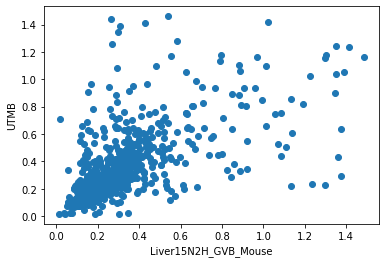

In [62]:
temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<1.5)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
                                (utmb_Liver15N2H_GVB_Mouse.rateconst<1.5)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
plt.scatter(temp.k0,temp.rateconst)
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")

# 5. Merge UTMB and Savitzky data

In [63]:
utmb_Savitzky_data=Savitzky_data.merge(utmb_data,left_on=Savitzky_data["gene_name"].str.lower(),
                                       right_on=utmb_data["Gene names"].str.lower()) [["Gene names","Entry name","Entry",
                                                                                      "rateconst","Hepatocytes replicate 1 half_life",
                                                                                       "Hepatocytes replicate 2 half_life","average_k"
                                                                                      ]]
utmb_Savitzky_data.tail()

,Gene names,Entry name,Entry,rateconst,Hepatocytes replicate 1 half_life,Hepatocytes replicate 2 half_life,average_k
566,Spr,SPRE_MOUSE,Q64105,0.240561,290.101,249.216,11.235771
567,Sugct,SUCHY_MOUSE,Q7TNE1,0.393404,159.529,NaN,6.647042
568,Suox,SUOX_MOUSE,Q8R086,0.149425,171.884,NaN,7.161833
569,Ttpa,TTPA_MOUSE,Q8BWP5,0.485075,443.037,294.271,15.360583
570,Ugt2a3,UD2A3_MOUSE,Q8BWQ1,0.232624,158.730,125.157,5.914313


Text(0, 0.5, 'UTMB')

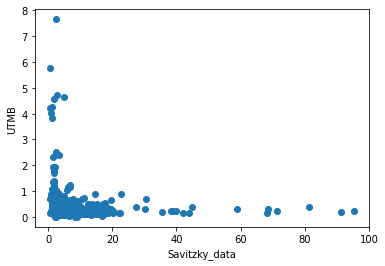

In [64]:
temp= utmb_Savitzky_data[(utmb_Savitzky_data.average_k<3)&(utmb_Savitzky_data.average_k>0) & 
                                (utmb_Savitzky_data.rateconst<3)&(utmb_Savitzky_data.rateconst>0)]

plt.scatter(utmb_Savitzky_data["average_k"],utmb_Savitzky_data.rateconst)
plt.xlabel("Savitzky_data")
plt.ylabel("UTMB")

## 6. Merge all Data

In [51]:
all_data=utmb_Liver15N2H_GVB_Mouse.merge(utmb_Savitzky_data, left_on=["Entry name"], right_on=["Entry name"])[["Entry_x","Entry name","k0","rateconst_x","Gene names_x","average_k"]]
all_data.head()

,Entry_x,Entry name,k0,rateconst_x,Gene names_x,average_k
0,A2AS89,SPEB_MOUSE,0.123579,0.136035,Agmat,22.276687
1,O08600,NUCG_MOUSE,0.000000,0.417303,Endog,1.136292
2,O08749,DLDH_MOUSE,0.126863,0.137833,Dld,5.806563
3,O08795,GLU2B_MOUSE,0.306322,0.423288,Prkcsh,6.732583
4,O08807,PRDX4_MOUSE,0.360030,0.366424,Prdx4,4.629750


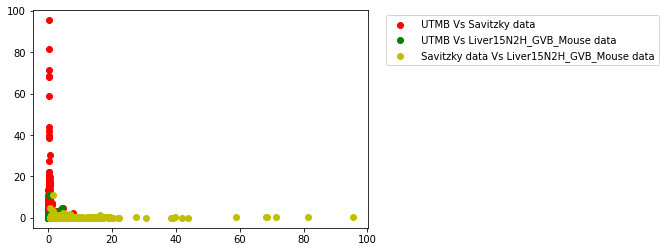

In [84]:
plt.scatter(all_data["rateconst_x"],all_data.average_k,c='r',label=" UTMB Vs Savitzky data")
plt.scatter(all_data["rateconst_x"],all_data.k0,c='g',label=" UTMB Vs Liver15N2H_GVB_Mouse data")
plt.scatter(all_data["average_k"],all_data.k0,c='y',label=" Savitzky data Vs Liver15N2H_GVB_Mouse data")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# plt.legend(loc="upper left")

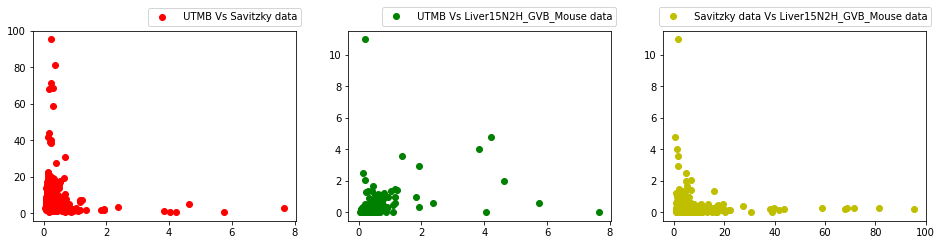

In [100]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.subplot(1, 3, 1)
plt.scatter(all_data["rateconst_x"],all_data.average_k,c='r',label=" UTMB Vs Savitzky data")
plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")
plt.subplot(1, 3, 2)
plt.scatter(all_data["rateconst_x"],all_data.k0,c='g',label=" UTMB Vs Liver15N2H_GVB_Mouse data")
plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")
plt.subplot(1, 3, 3)
plt.scatter(all_data["average_k"],all_data.k0,c='y',label=" Savitzky data Vs Liver15N2H_GVB_Mouse data")
plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")

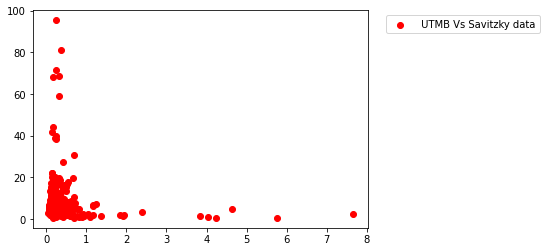

In [85]:
plt.scatter(all_data["rateconst_x"],all_data.average_k,c='r',label=" UTMB Vs Savitzky data")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

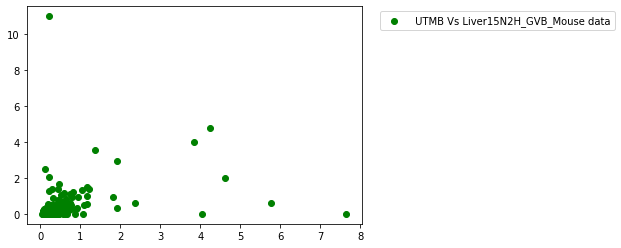

In [86]:

plt.scatter(all_data["rateconst_x"],all_data.k0,c='g',label=" UTMB Vs Liver15N2H_GVB_Mouse data")
# plt.ylabel("other")
# plt.xlabel("UTMB")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

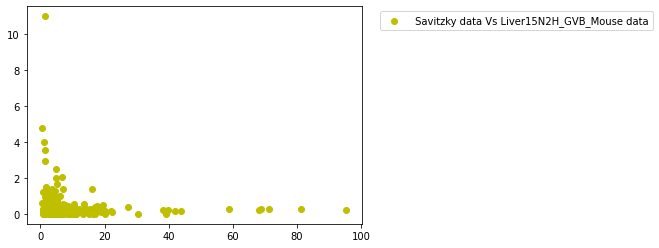

In [87]:

plt.scatter(all_data["average_k"],all_data.k0,c='y',label=" Savitzky data Vs Liver15N2H_GVB_Mouse data")
# plt.ylabel("other")
# plt.xlabel("UTMB")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [88]:
temp= all_data[["average_k","k0","rateconst_x"]].query("average_k<1 and k0<1 and rateconst_x<1 and \
                                                       average_k>0 and k0>0 and rateconst_x>0  ")
temp.columns=["Savitzky","Liver15N2H_GVB_Mouse","UTMB"]
corr=temp.corr()
corr

,Savitzky,Liver15N2H_GVB_Mouse,UTMB
Savitzky,1.000000,0.558522,-0.106916
Liver15N2H_GVB_Mouse,0.558522,1.000000,0.517877
UTMB,-0.106916,0.517877,1.000000


In [89]:
corr.style.background_gradient(cmap ='summer')\
        .set_properties(**{'font-size': '20px'})

,Savitzky,Liver15N2H_GVB_Mouse,UTMB
Savitzky,1.000000,0.558522,-0.106916
Liver15N2H_GVB_Mouse,0.558522,1.000000,0.517877
UTMB,-0.106916,0.517877,1.000000
